#Part 1: Housing Data



In [ ]:
#code cell 1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets

housing_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/HW_4/cadata_edited.txt', sep = '\s+', skiprows=26)
print(housing_data.head())

   median_house_val  median_income  median_house_age  total_rooms  \
0          452600.0         8.3252              41.0        880.0   
1          358500.0         8.3014              21.0       7099.0   
2          352100.0         7.2574              52.0       1467.0   
3          341300.0         5.6431              52.0       1274.0   
4          342200.0         3.8462              52.0       1627.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0       496.0       177.0     37.85    -122.24  
3           235.0       558.0       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25  


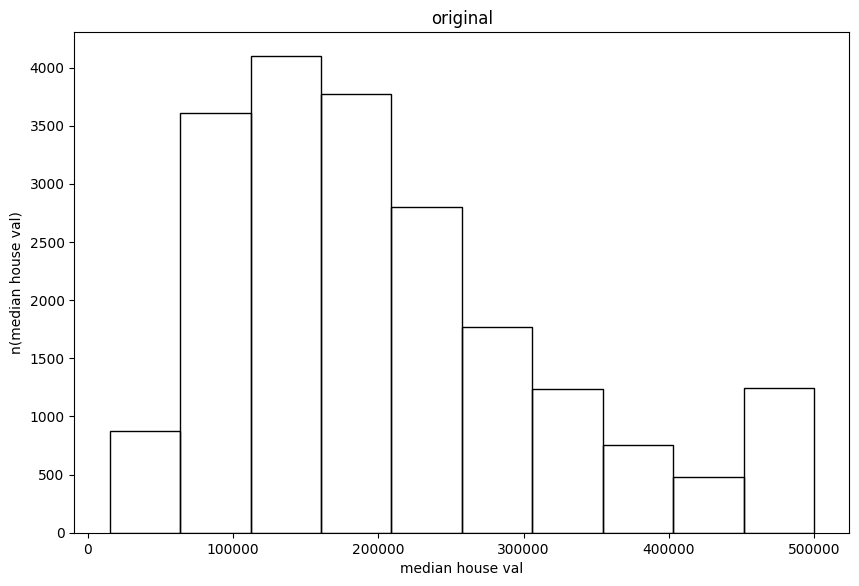

In [ ]:
#Code cell 2
figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(housing_data['median_house_val'], bins=10, fill=False)
ax.set_title('original')
ax.set_xlabel('median house val')
ax.set_ylabel('n(median house val)')
fig.show()


###Unit discussion for code cell 2

My best guess to the units of this data is dollars. It would make sense that the more expensive the houses get, the less likely people are to be able to afford them, so they get fewer as the price goes up.

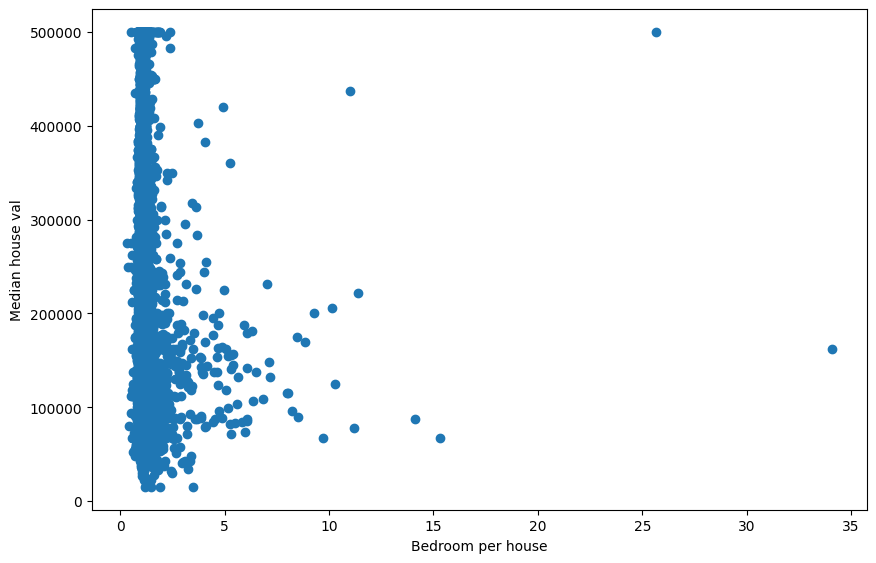

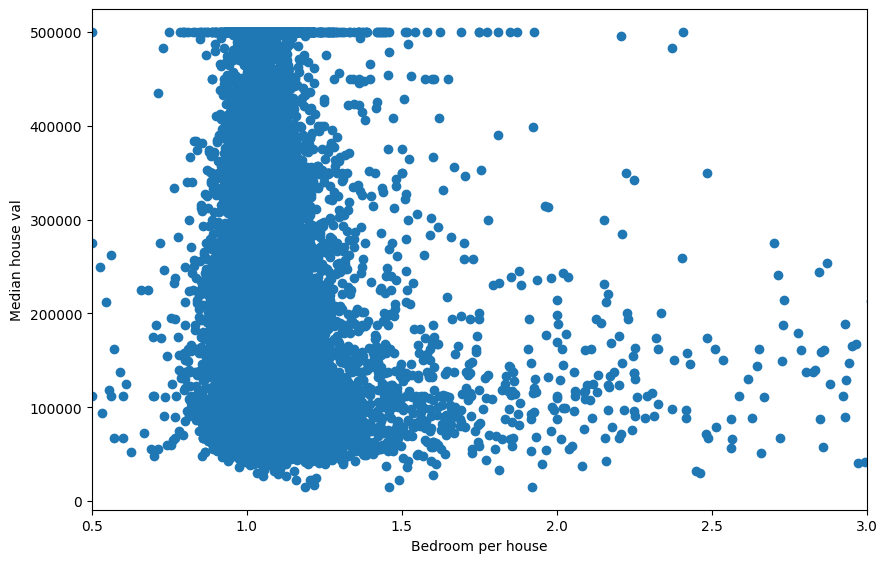

In [ ]:
#Code cell 3
bedroom_per_house = housing_data['total_bedrooms'] / housing_data['households']

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(bedroom_per_house, housing_data['median_house_val'])
ax.set_xlabel('Bedroom per house')
ax.set_ylabel('Median house val')
plt.show()

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(bedroom_per_house, housing_data['median_house_val'])
ax.set_xlabel('Bedroom per house')
ax.set_ylabel('Median house val')
ax.set_xlim(0.5, 3)
plt.show()

###Code Cell 3 Discussion

The value of the house does not seem to depend on the number of bedrooms per household. It seems that, regardless of value, the average bedroom per house is around 1 or 2 bedrooms. So, there does not seem to be a distinct pattern or correlation. It seems that the total number of bedrooms feature is all of the bedrooms in a specific area or region. Therefore, when you divide it by the number of households in that area or region, you get the amount of bedrooms in each house. For the most part its data seems reasonable, with most of the houses falling within the range of 1-3 bedrooms. However, there is a bit of data that dips below 1 to be between 0.5-1. This might take into consideration studio apartments or sharing a living space, so those might be counted as not a full 1 bedroom.

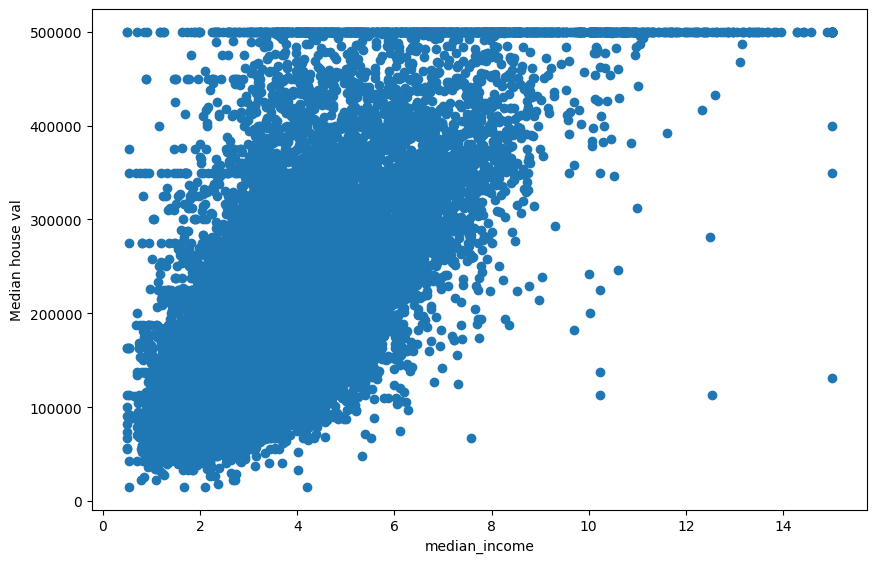

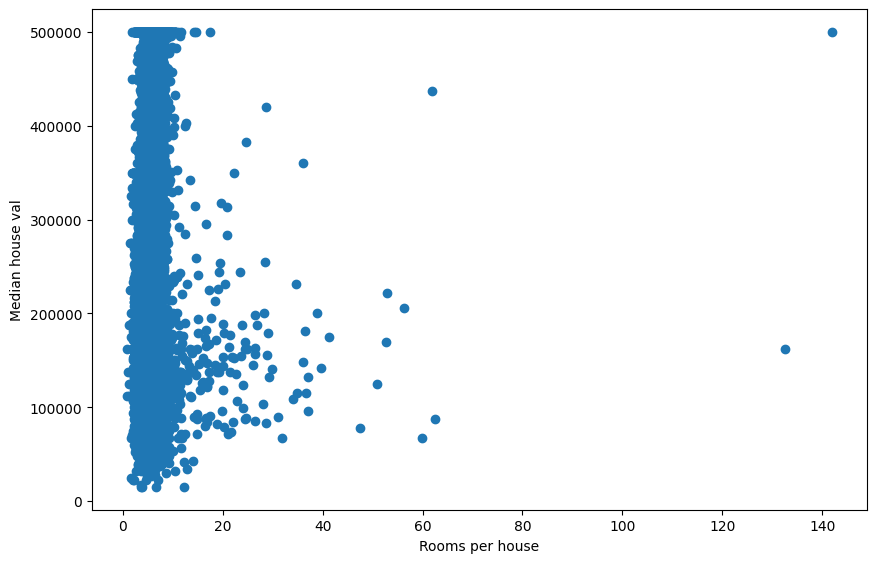

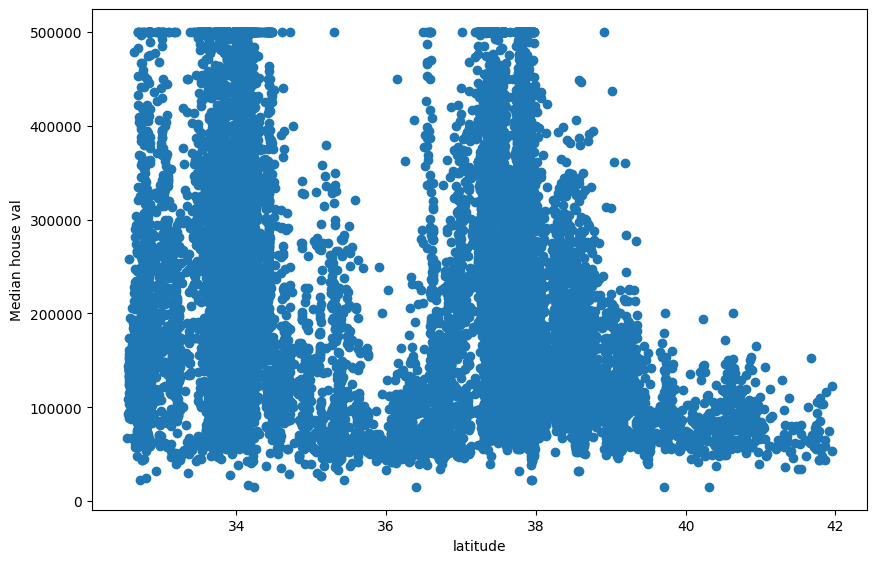

In [ ]:
#Code cell 4
figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(housing_data['median_income'], housing_data['median_house_val'])
ax.set_xlabel('median_income')
ax.set_ylabel('Median house val')


plt.show()


figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)

rooms_per_house = housing_data['total_rooms'] / housing_data['households']

ax.scatter(rooms_per_house, housing_data['median_house_val'])
ax.set_xlabel('Rooms per house')
ax.set_ylabel('Median house val')

plt.show()

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(housing_data['latitude'], housing_data['median_house_val'])
ax.set_xlabel('latitude')
ax.set_ylabel('Median house val')

plt.show()





###Code cell 4 Discussion

The one that shows the most significant pattern is the one that compares the median house value to the median income. We see a positive correlation and this makes sense because the more money you make, the more you can contribute towards a house, so the value is higher. The comparision of the median house value and rooms per house don't seem to have any significant pattern. Comparing the median house value and latitude does seem to show some pattern. I am not sure if this pattern is significant or what pattern it would even qualify as. It makes sense though that in some areas of the world the median house value is greater in more desirable areas to live. For example, you would not expect to see high house values near the poles or even right on the equator. More temperate areas would see a higher house value, so that would explain the spikes in house value as latitude changes.

#Part 2: Data standardization

In [ ]:
#code cell 1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/HW_4/preprocessing_sample_data_onehot.csv', index_col = 0)
print(df.head())
print(df.columns)

   weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
0   0.003776         199.132337  285.580952          0          0          1
1   0.008966         193.617089  303.793877          0          0          1
2   0.003654         109.604169  364.958930          1          0          0
3   0.009349         249.698449  361.290959          0          0          1
4   0.005907         125.443557  231.345769          0          1          0
Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')


In [ ]:
#Code cell 2
from sklearn.model_selection import train_test_split
np.random.seed(5)
df_fit, df_test = train_test_split(df, test_size = 0.25)

In [ ]:
#Code cell 3

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


fit_data_features = df_fit.drop('avg_rating', axis=1)
fit_data_y = df_fit['avg_rating']

test_data_features = df_test.drop('avg_rating', axis=1)
test_data_y = df_test['avg_rating']

lin_reg_model = LinearRegression()
lin_reg_model.fit(fit_data_features, fit_data_y)

ridge_model = Ridge(0.01)
ridge_model.fit(fit_data_features, fit_data_y)



Ridge(alpha=0.01)

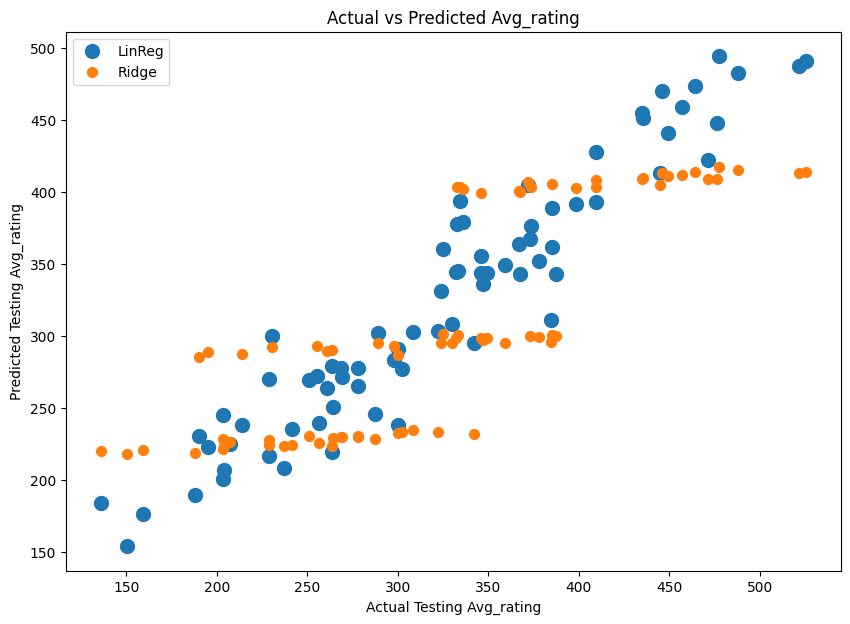

In [ ]:
#Code cell 4

lin_reg_pred = lin_reg_model.predict(test_data_features)
ridge_pred = ridge_model.predict(test_data_features)


figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_data_y, lin_reg_pred, s=100, label='LinReg')
ax.scatter(test_data_y, ridge_pred, s=50, label='Ridge')

ax.set_title('Actual vs Predicted Avg_rating')
ax.set_xlabel('Actual Testing Avg_rating')
ax.set_ylabel('Predicted Testing Avg_rating')

ax.legend()
plt.show()


###Code cell 4 discussion

A perfect fit would be if the predicted data is the same as the actual data (or y=x) so the plot would be a straight diagonal line. In this case, the linear regression model seems to be following the general pattern of a diagonal line and following the trend of what we would like to see. The ridge model, however, seems to have an interesting behavior of forming clusters of horizontal lines. This is probably due to the varying units seen in the x and y values. Since the goal of ridge regression is to prevent overfitting, the model decreases the varaince and becomes too rigid in this case. The ridge model is oversimplifing the data and maybe focusing on certain features over others.

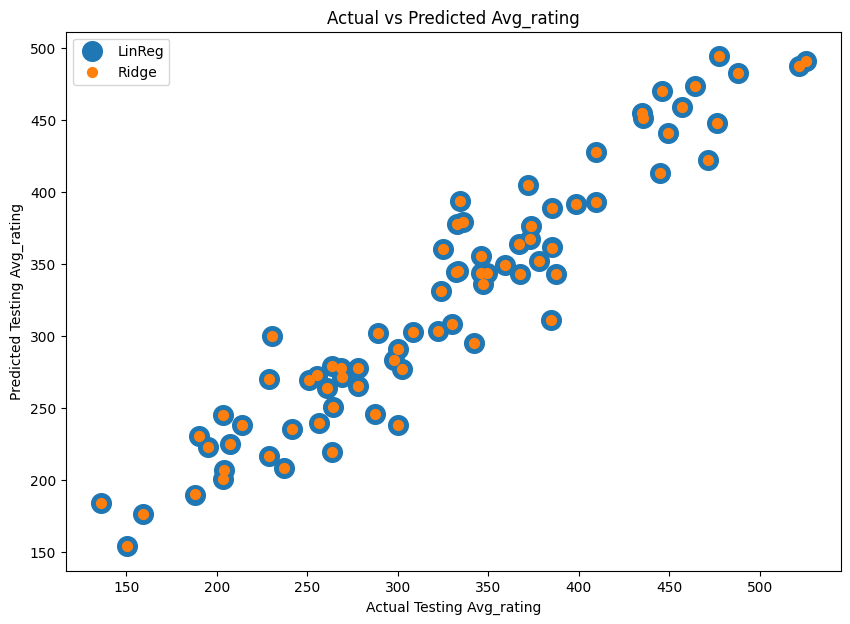

In [ ]:
###Code cell 5

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linreg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.01))

linreg_pipeline.fit(fit_data_features, fit_data_y)
ridge_pipeline.fit(fit_data_features, fit_data_y)

linreg_pipeline_pred = linreg_pipeline.predict(test_data_features)
ridge_pipeline_pred = ridge_pipeline.predict(test_data_features)


figsize = (10, 7)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_data_y, linreg_pipeline_pred, s=200, label='LinReg')
ax.scatter(test_data_y, ridge_pipeline_pred, s=50, label='Ridge')

ax.set_title('Actual vs Predicted Avg_rating')
ax.set_xlabel('Actual Testing Avg_rating')
ax.set_ylabel('Predicted Testing Avg_rating')

ax.legend()
plt.show()




###Code cell 5 discussion

With the standardization, the models are exactly the same. Now that the units are not interfering with the data, the mean shifts to 0 and variance to 1. The linear regression model looks the same whether it has the standardization or not because it is showing the general relationship between the two variables, and this relationship remains the same regardless of the units. However, standardization impacts the ridge model quite a bit. With standardization the features become unitless, so they become consistent for the ridge model. Now that all the features can contribute evenly, the ridge model can predict the data more accurately.